#  Positive Involvement Violations

In [1]:
# import the Profile class

from voting.profiles import *

# import the voting methods

from voting.voting_methods import _num_rank_first
from voting.voting_methods import *

import math
import random
import pandas as pd
from itertools import product, combinations, product
from functools import partial
from multiprocess import Pool, cpu_count
import pickle

import copy
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Finding Instances of PI Violations

In [2]:
def add_voters(prof, num_voters,  cand = None, cand_position = None, prob_model = "IC", uniform_coalition = False):
    '''Add num_voters to the profile prof:  
    If cand is None, then choose random profiles (according to probability model prob_model). 
    If cand is not None, then create a profile in which all voters rank cand in position cand_position
    If unfiorm_coaltion is True, the added coalition all have the same ranking. 
    '''
    if cand is None: 
        if uniform_coalition: 
            new_voters_profile = generate_profile(prof.num_cands, 
                                                  1, 
                                                  probmod=prob_model)

            new_rankings = list(prof._rankings) + list(new_voters_profile._rankings)*num_voters
            new_rcounts = list(prof._rcounts) + [1]*num_voters
            
            
        else:
            new_voters_profile = generate_profile(prof.num_cands, 
                                                      num_voters, 
                                                      probmod=prob_model)

            new_rankings = list(prof._rankings) + list(new_voters_profile._rankings)
            new_rcounts = list(prof._rcounts) + list(new_voters_profile._rcounts)

    else: 
        if uniform_coalition:
            new_voters_profile = generate_profile(prof.num_cands - 1,
                                                  1, 
                                                  probmod=prob_model)
            _new_rankings = list(new_voters_profile._rankings) * num_voters
            _new_rcounts = [1] * num_voters

            
        else: 
            new_voters_profile = generate_profile(prof.num_cands - 1,
                                                      num_voters, 
                                                      probmod=prob_model)
            _new_rankings = new_voters_profile._rankings
            _new_rcounts = new_voters_profile._rcounts
            
        modified_rankings = list()
        for r in _new_rankings:
                
            new_r = [c if c < cand else c+1 for c in r]
            new_r.insert(cand_position - 1, cand)
            modified_rankings.append(tuple(new_r))
            
        new_rankings = list(prof._rankings) + list(modified_rankings)
        new_rcounts = list(prof._rcounts) + list(_new_rcounts)
            
    return Profile([tuple(r) for r in new_rankings], prof.num_cands, rcounts = list(new_rcounts))

    

Beat Path
	Cands 4
	Voters 6
Copeland
	Cands 4
	Voters 6
Llull
	Cands 4
	Voters 6
Top Cycle
	Cands 4
	Voters 6
Found Example for Top Cycle
Top Cycle winners  [0, 1, 2, 3]
+---+---+---+---+
| 1 | 2 | 2 | 1 |
+---+---+---+---+
| 0 | 2 | 1 | 3 |
| 2 | 1 | 3 | 1 |
| 1 | 0 | 0 | 0 |
| 3 | 3 | 2 | 2 |
+---+---+---+---+


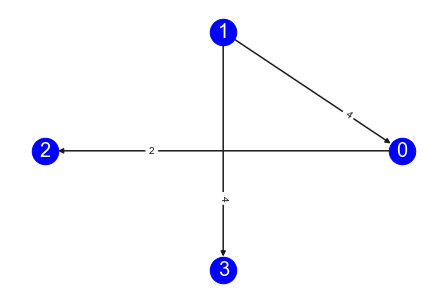


Profile with a new ranking [0 1 2 3]
Top Cycle winners  [1]
+---+---+---+---+---+
| 1 | 2 | 2 | 1 | 1 |
+---+---+---+---+---+
| 0 | 2 | 1 | 3 | 0 |
| 2 | 1 | 3 | 1 | 1 |
| 1 | 0 | 0 | 0 | 2 |
| 3 | 3 | 2 | 2 | 3 |
+---+---+---+---+---+


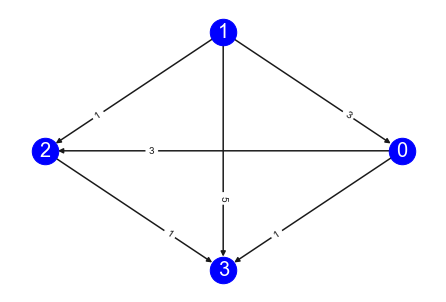

-------

Found Example for Top Cycle
Top Cycle winners  [0, 1, 2, 3]
+---+---+---+---+
| 1 | 2 | 2 | 1 |
+---+---+---+---+
| 0 | 2 | 1 | 3 |
| 2 | 1 | 3 | 1 |
| 1 | 0 | 0 | 0 |
| 3 | 3 | 2 | 2 |
+---+---+---+---+


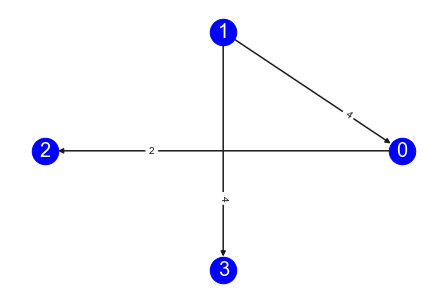


Profile with a new ranking [3 0 1 2]
Top Cycle winners  [1]
+---+---+---+---+---+
| 1 | 2 | 2 | 1 | 1 |
+---+---+---+---+---+
| 0 | 2 | 1 | 3 | 3 |
| 2 | 1 | 3 | 1 | 0 |
| 1 | 0 | 0 | 0 | 1 |
| 3 | 3 | 2 | 2 | 2 |
+---+---+---+---+---+


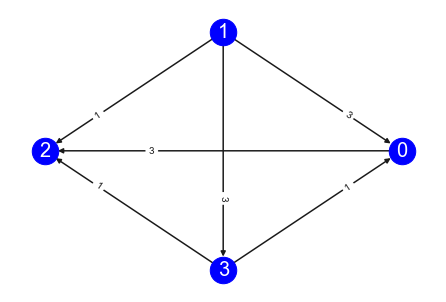

-------

Found Example for Top Cycle
Top Cycle winners  [0, 1, 2, 3]
+---+---+---+---+---+
| 1 | 2 | 1 | 1 | 1 |
+---+---+---+---+---+
| 2 | 1 | 0 | 0 | 3 |
| 1 | 2 | 3 | 3 | 0 |
| 3 | 0 | 1 | 2 | 2 |
| 0 | 3 | 2 | 1 | 1 |
+---+---+---+---+---+


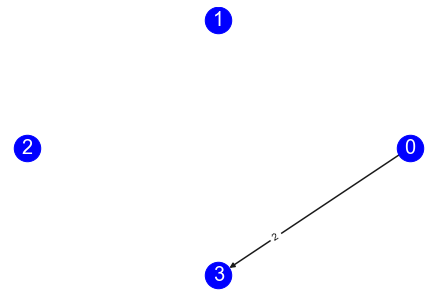


Profile with a new ranking [3 0 2 1]
Top Cycle winners  [0]
+---+---+---+---+---+---+
| 1 | 2 | 1 | 1 | 1 | 1 |
+---+---+---+---+---+---+
| 2 | 1 | 0 | 0 | 3 | 3 |
| 1 | 2 | 3 | 3 | 0 | 0 |
| 3 | 0 | 1 | 2 | 2 | 2 |
| 0 | 3 | 2 | 1 | 1 | 1 |
+---+---+---+---+---+---+


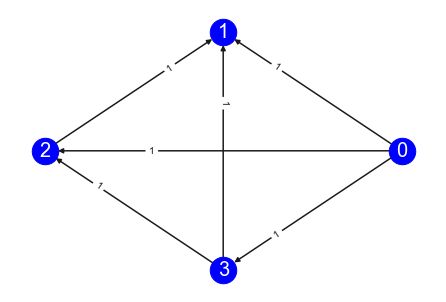

-------

GOCHA
	Cands 4
	Voters 6
Baldwin
	Cands 4
	Voters 6
Baldwin PUT
	Cands 4
	Voters 6
Coombs
	Cands 4
	Voters 6
Coombs PUT
	Cands 4
	Voters 6
Found Example for Coombs PUT
Coombs PUT winners  [0, 1, 2]
+---+---+---+---+---+
| 2 | 1 | 1 | 1 | 1 |
+---+---+---+---+---+
| 2 | 3 | 1 | 0 | 0 |
| 1 | 0 | 0 | 1 | 3 |
| 0 | 2 | 3 | 2 | 2 |
| 3 | 1 | 2 | 3 | 1 |
+---+---+---+---+---+


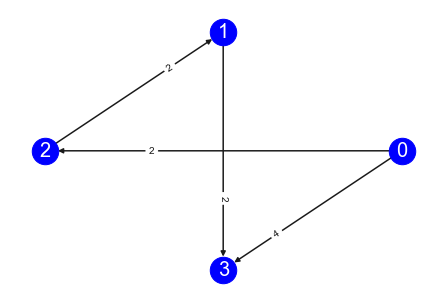


Profile with a new ranking [2 0 1 3]
Coombs PUT winners  [0]
+---+---+---+---+---+---+
| 2 | 1 | 1 | 1 | 1 | 1 |
+---+---+---+---+---+---+
| 2 | 3 | 1 | 0 | 0 | 2 |
| 1 | 0 | 0 | 1 | 3 | 0 |
| 0 | 2 | 3 | 2 | 2 | 1 |
| 3 | 1 | 2 | 3 | 1 | 3 |
+---+---+---+---+---+---+


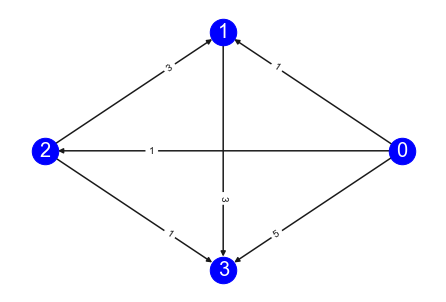

-------

Found Example for Coombs PUT
Coombs PUT winners  [0, 2, 3]
+---+---+---+---+---+---+
| 1 | 1 | 1 | 1 | 1 | 1 |
+---+---+---+---+---+---+
| 2 | 3 | 0 | 3 | 3 | 2 |
| 0 | 2 | 3 | 0 | 0 | 1 |
| 1 | 1 | 2 | 1 | 2 | 0 |
| 3 | 0 | 1 | 2 | 1 | 3 |
+---+---+---+---+---+---+


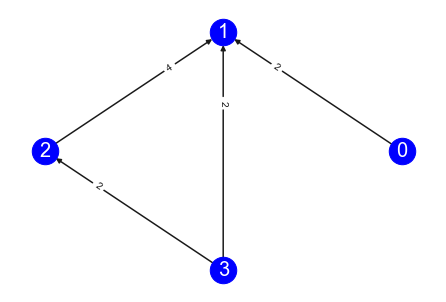


Profile with a new ranking [2 3 0 1]
Coombs PUT winners  [3]
+---+---+---+---+---+---+---+
| 1 | 1 | 1 | 1 | 1 | 1 | 1 |
+---+---+---+---+---+---+---+
| 2 | 3 | 0 | 3 | 3 | 2 | 2 |
| 0 | 2 | 3 | 0 | 0 | 1 | 3 |
| 1 | 1 | 2 | 1 | 2 | 0 | 0 |
| 3 | 0 | 1 | 2 | 1 | 3 | 1 |
+---+---+---+---+---+---+---+


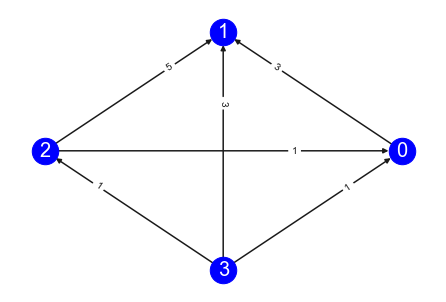

-------

Strict Nanson
	Cands 4
	Voters 6
Weak Nanson
	Cands 4
	Voters 6
Bucklin
	Cands 4
	Voters 6
Simplified Bucklin
	Cands 4
	Voters 6
Daunou
	Cands 4
	Voters 6
Found Example for Daunou
Daunou winners  [0, 1, 2]
+---+---+---+---+---+
| 1 | 2 | 1 | 1 | 1 |
+---+---+---+---+---+
| 2 | 0 | 1 | 2 | 1 |
| 1 | 1 | 3 | 0 | 2 |
| 0 | 3 | 2 | 1 | 3 |
| 3 | 2 | 0 | 3 | 0 |
+---+---+---+---+---+


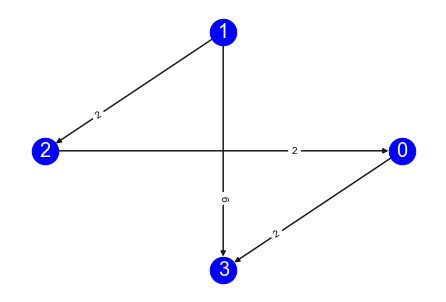


Profile with a new ranking [2 1 3 0]
Daunou winners  [1]
+---+---+---+---+---+---+
| 1 | 2 | 1 | 1 | 1 | 1 |
+---+---+---+---+---+---+
| 2 | 0 | 1 | 2 | 1 | 2 |
| 1 | 1 | 3 | 0 | 2 | 1 |
| 0 | 3 | 2 | 1 | 3 | 3 |
| 3 | 2 | 0 | 3 | 0 | 0 |
+---+---+---+---+---+---+


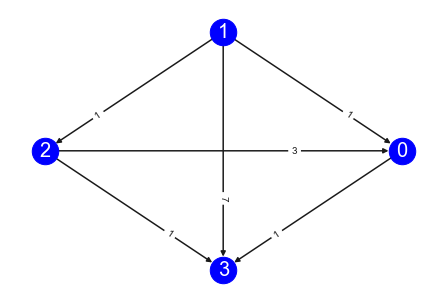

-------

Found Example for Daunou
Daunou winners  [1, 3]
+---+---+---+---+---+---+
| 1 | 1 | 1 | 1 | 1 | 1 |
+---+---+---+---+---+---+
| 3 | 1 | 3 | 1 | 0 | 2 |
| 0 | 0 | 0 | 3 | 2 | 0 |
| 2 | 3 | 1 | 2 | 3 | 1 |
| 1 | 2 | 2 | 0 | 1 | 3 |
+---+---+---+---+---+---+


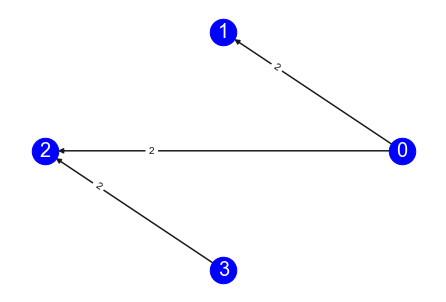


Profile with a new ranking [1 0 3 2]
Daunou winners  [0]
+---+---+---+---+---+---+---+
| 1 | 1 | 1 | 1 | 1 | 1 | 1 |
+---+---+---+---+---+---+---+
| 3 | 1 | 3 | 1 | 0 | 2 | 1 |
| 0 | 0 | 0 | 3 | 2 | 0 | 0 |
| 2 | 3 | 1 | 2 | 3 | 1 | 3 |
| 1 | 2 | 2 | 0 | 1 | 3 | 2 |
+---+---+---+---+---+---+---+


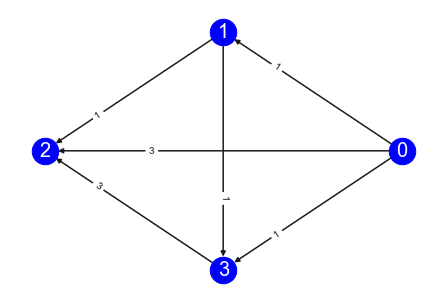

-------

Uncovered Set
	Cands 4
	Voters 6
UC Fishburn
	Cands 4
	Voters 6
UC Bordes
	Cands 4
	Voters 6
Found Example for UC Bordes
UC Bordes winners  [0, 2, 3]
+---+---+---+---+---+
| 1 | 1 | 2 | 1 | 1 |
+---+---+---+---+---+
| 1 | 2 | 3 | 0 | 2 |
| 3 | 3 | 0 | 1 | 0 |
| 2 | 0 | 2 | 2 | 1 |
| 0 | 1 | 1 | 3 | 3 |
+---+---+---+---+---+


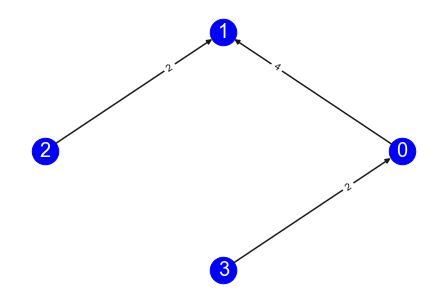


Profile with a new ranking [0 3 1 2]
UC Bordes winners  [3]
+---+---+---+---+---+---+
| 1 | 1 | 2 | 1 | 1 | 1 |
+---+---+---+---+---+---+
| 1 | 2 | 3 | 0 | 2 | 0 |
| 3 | 3 | 0 | 1 | 0 | 3 |
| 2 | 0 | 2 | 2 | 1 | 1 |
| 0 | 1 | 1 | 3 | 3 | 2 |
+---+---+---+---+---+---+


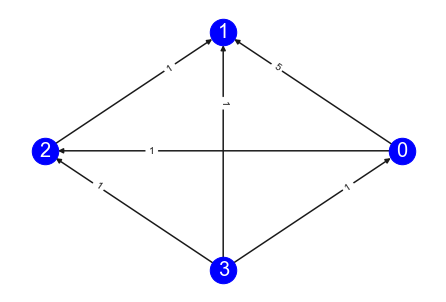

-------

UC McKelvey
	Cands 4
	Voters 6
Found Example for UC McKelvey
UC McKelvey winners  [0, 2, 3]
+---+---+---+---+---+---+
| 1 | 1 | 1 | 1 | 1 | 1 |
+---+---+---+---+---+---+
| 0 | 0 | 1 | 3 | 1 | 2 |
| 2 | 1 | 0 | 2 | 3 | 0 |
| 3 | 3 | 3 | 0 | 2 | 1 |
| 1 | 2 | 2 | 1 | 0 | 3 |
+---+---+---+---+---+---+


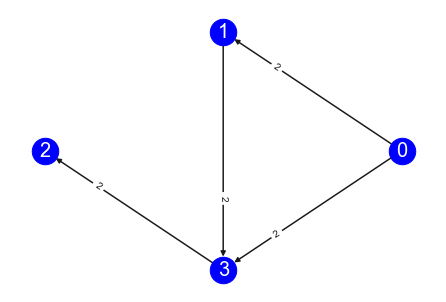


Profile with a new ranking [3 0 1 2]
UC McKelvey winners  [0]
+---+---+---+---+---+---+---+
| 1 | 1 | 1 | 1 | 1 | 1 | 1 |
+---+---+---+---+---+---+---+
| 0 | 0 | 1 | 3 | 1 | 2 | 3 |
| 2 | 1 | 0 | 2 | 3 | 0 | 0 |
| 3 | 3 | 3 | 0 | 2 | 1 | 1 |
| 1 | 2 | 2 | 1 | 0 | 3 | 2 |
+---+---+---+---+---+---+---+


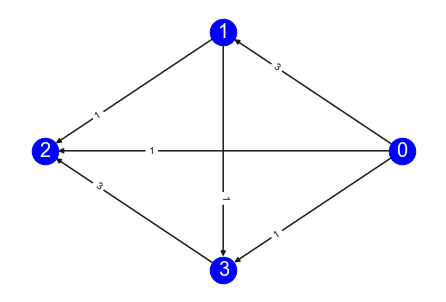

-------

Blacks
	Cands 4
	Voters 6
Ranked Pairs ZT
	Cands 4
	Voters 6
Ranked Pairs T
	Cands 4
	Voters 6
Ranked Pairs
	Cands 4
	Voters 6
ALARM signal received



In [3]:
import signal
import time
 
    
class TimeOutException(Exception):
    pass
 
def alarm_handler(signum, frame):
    print("ALARM signal received")
    raise TimeOutException()


signal.signal(signal.SIGALRM, alarm_handler)

num_trials = 10#000

vms_violate_pi = [
    beat_path_faster,
    copeland,
    llull,
    getcha, # Top Cycle
    gocha, 
    baldwin, 
    baldwin_put,
    coombs,
    coombs_put,
    strict_nanson, 
    weak_nanson,
    bucklin, 
    simplified_bucklin, 
    daunou,
    uc_gill, 
    uc_fish, 
    uc_bordes, 
    uc_mckelvey,
    blacks,
    ranked_pairs_zt,
    ranked_pairs_t,
    ranked_pairs,
]


all_num_cands = [4 ] #, 5] #, 8, 9, 10]
all_num_voters = [6] #, 7, 8] # 9, 10, 11, 25]


for vm in vms_violate_pi: 
    found_pi_violation = False
    print(vm.name)
    voting_scenarios = product(all_num_cands, all_num_voters)#[ (4,10),(4,11), (4, 20), (4,25), (4, 50), (4,100), (4,101),    (5,5), (5,11), (5,25), (5,51)]

    for num_cands, num_voters in voting_scenarios: 

        print("\tCands", num_cands)
        print("\tVoters", num_voters)
        for t in range(num_trials):
            prof = generate_profile(num_cands, num_voters)
            ws = list()
            signal.alarm(2)
            try:
                ws = vm(prof) 
            except TimeOutException as ex:
                print(ex)
                continue
            signal.alarm(0)
            for  a_winner in ws:
                
                prof_with_a_voters = add_voters(prof, 1, cand=a_winner, cand_position = 1)
                
                ws_new = list()
                signal.alarm(2)
                try:
                    ws_new   = vm(prof_with_a_voters)
                except TimeOutException as ex:
                    print(ex)
                    continue
                signal.alarm(0)                
               
                if  a_winner not in ws_new:
                    print(f"Found Example for {vm.name}")
                    print(f"{vm.name} winners ", ws)
                    prof.display()
                    prof.display_margin_graph()

                    print(f"\nProfile with a new ranking {prof_with_a_voters._rankings[-1]}")
                    print(f"{vm.name} winners ", ws_new)
                    prof_with_a_voters.display()
                    prof_with_a_voters.display_margin_graph()
                    print("-------\n")

## Failures of PI

In [4]:
a = 0
b = 1
c = 2
d = 3
e = 4

cmap = {
    a: "a",
    b: "b",
    c: "c",
    d: "d",
    e: "e"
}

In [5]:

vm = baldwin
num_cands = 4

rankings = [
    (b, a, d, c), 
    (c, b, d, a),
    (d, a, c, b),
    (d, b, a, c),
    (a, c, b, d)
]

new_ranking = (c, a, b, d)

rcounts = [1, 2, 1, 1, 1]

prof = Profile(rankings, num_cands, rcounts, cmap = cmap)

prof.display()

print(f"{vm.name} winners {[cmap[c] for c in vm(prof)]}")
print(f"{baldwin_put.name} winners {[cmap[c] for c in baldwin_put(prof)]}")
print("")

print(f"The profile with a voter with the ranking {[cmap[c] for c in new_ranking]}")

prof_new = Profile(rankings + [new_ranking], num_cands, rcounts + [1], cmap = cmap)
prof_new.display()

print(f"{vm.name} winners {[cmap[c] for c in vm(prof_new)]}")
print(f"{baldwin_put.name} winners {[cmap[c] for c in baldwin_put(prof_new)]}")


+---+---+---+---+---+
| 1 | 2 | 1 | 1 | 1 |
+---+---+---+---+---+
| b | c | d | d | a |
| a | b | a | b | c |
| d | d | c | a | b |
| c | a | b | c | d |
+---+---+---+---+---+
Baldwin winners ['c']
Baldwin PUT winners ['c']

The profile with a voter with the ranking ['c', 'a', 'b', 'd']
+---+---+---+---+---+---+
| 1 | 2 | 1 | 1 | 1 | 1 |
+---+---+---+---+---+---+
| b | c | d | d | a | c |
| a | b | a | b | c | a |
| d | d | c | a | b | b |
| c | a | b | c | d | d |
+---+---+---+---+---+---+
Baldwin winners ['a']
Baldwin PUT winners ['a']


+---+---+---+---+---+---+---+---+---+---+
| 1 | 1 | 1 | 1 | 2 | 1 | 1 | 1 | 1 | 1 |
+---+---+---+---+---+---+---+---+---+---+
| a | d | c | c | a | b | a | d | d | b |
| d | c | a | b | c | d | b | c | b | a |
| c | b | b | d | b | c | d | a | c | d |
| b | a | d | a | d | a | c | b | a | c |
+---+---+---+---+---+---+---+---+---+---+


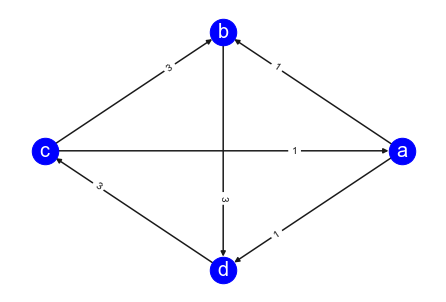

Beat Path winners ['a', 'b', 'c', 'd']

The profile with a voter with the ranking ['b', 'a', 'c', 'd']
+---+---+---+---+---+---+---+---+---+---+---+
| 1 | 1 | 1 | 1 | 2 | 1 | 1 | 1 | 1 | 1 | 1 |
+---+---+---+---+---+---+---+---+---+---+---+
| a | d | c | c | a | b | a | d | d | b | b |
| d | c | a | b | c | d | b | c | b | a | a |
| c | b | b | d | b | c | d | a | c | d | c |
| b | a | d | a | d | a | c | b | a | c | d |
+---+---+---+---+---+---+---+---+---+---+---+


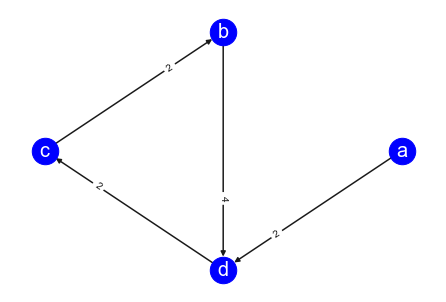

Beat Path winners ['a']


In [6]:
 
vm = beat_path_faster
num_cands = 4

rankings = [
    (a, d, c, b),
    (d, c, b, a),
    (c, a, b, d), 
    (c, b, d, a), 
    (a, c, b, d), 
    (b, d, c, a), 
    (a, b, d, c), 
    (d, c, a, b), 
    (d, b, c, a), 
    (b, a, d, c)
]

new_ranking = (b, a, c, d)

rcounts = [1, 1, 1, 1, 2, 1, 1, 1, 1, 1]

prof = Profile(rankings, num_cands, rcounts, cmap = cmap)

prof.display()
prof.display_margin_graph()

print(f"{vm.name} winners {[cmap[c] for c in vm(prof)]}")
print("")

print(f"The profile with a voter with the ranking {[cmap[c] for c in new_ranking]}")

prof_new = Profile(rankings + [new_ranking], num_cands, rcounts + [1], cmap = cmap)
prof_new.display()
prof_new.display_margin_graph()

print(f"{vm.name} winners {[cmap[c] for c in vm(prof_new)]}")


In [7]:
vm = bucklin

num_cands = 5

rankings = [
    (a, b, c, e, d),
    (a, e, c, b, d),
    (b, e, c, d, a),
    (c, d, a, b, e)
]

new_ranking = (c, e, b, d, a)

rcounts = [1, 1, 1, 1]

prof = Profile(rankings, num_cands, rcounts, cmap = cmap)

prof.display()

print(f"{vm.name} winners {[cmap[c] for c in vm(prof)]}")
print(f"{simplified_bucklin.name} winners {[cmap[c] for c in simplified_bucklin(prof)]}")
print("")

print(f"The profile with a voter with the ranking {[cmap[c] for c in new_ranking]}")

prof_new = Profile(rankings + [new_ranking], num_cands, rcounts + [1], cmap = cmap)
prof_new.display()

print(f"{vm.name} winners {[cmap[c] for c in vm(prof_new)]}")
print(f"{simplified_bucklin.name} winners {[cmap[c] for c in simplified_bucklin(prof_new)]}")

+---+---+---+---+
| 1 | 1 | 1 | 1 |
+---+---+---+---+
| a | a | b | c |
| b | e | e | d |
| c | c | c | a |
| e | b | d | b |
| d | d | a | e |
+---+---+---+---+
Bucklin winners ['c']
Simplified Bucklin winners ['a', 'c']

The profile with a voter with the ranking ['c', 'e', 'b', 'd', 'a']
+---+---+---+---+---+
| 1 | 1 | 1 | 1 | 1 |
+---+---+---+---+---+
| a | a | b | c | c |
| b | e | e | d | e |
| c | c | c | a | b |
| e | b | d | b | d |
| d | d | a | e | a |
+---+---+---+---+---+
Bucklin winners ['e']
Simplified Bucklin winners ['e']


In [8]:
vm = coombs

num_cands = 4

rankings = [
    (a, b, d, c),
    (c, a, d, b),
    (a, d, b, c),
    (b, c, d, a),
    (c, b, a, d)
]

new_ranking = (a, d, c, b)

rcounts = [1, 2, 1, 1, 1]

prof = Profile(rankings, num_cands, rcounts, cmap = cmap)

prof.display()

print(f"{vm.name} winners {[cmap[c] for c in vm(prof)]}")
print(f"{coombs_put.name} winners {[cmap[c] for c in coombs_put(prof)]}")
print("")

print(f"The profile with a voter with the ranking {[cmap[c] for c in new_ranking]}")

prof_new = Profile(rankings + [new_ranking], num_cands, rcounts + [1], cmap = cmap)
prof_new.display()

print(f"{vm.name} winners {[cmap[c] for c in vm(prof_new)]}")
print(f"{coombs_put.name} winners {[cmap[c] for c in coombs_put(prof_new)]}")

+---+---+---+---+---+
| 1 | 2 | 1 | 1 | 1 |
+---+---+---+---+---+
| a | c | a | b | c |
| b | a | d | c | b |
| d | d | b | d | a |
| c | b | c | a | d |
+---+---+---+---+---+
Coombs winners ['a']
Coombs PUT winners ['a', 'c']

The profile with a voter with the ranking ['a', 'd', 'c', 'b']
+---+---+---+---+---+---+
| 1 | 2 | 1 | 1 | 1 | 1 |
+---+---+---+---+---+---+
| a | c | a | b | c | a |
| b | a | d | c | b | d |
| d | d | b | d | a | c |
| c | b | c | a | d | b |
+---+---+---+---+---+---+
Coombs winners ['c']
Coombs PUT winners ['c']


+---+---+---+
| 2 | 1 | 2 |
+---+---+---+
| a | b | c |
| b | c | a |
| c | a | b |
+---+---+---+


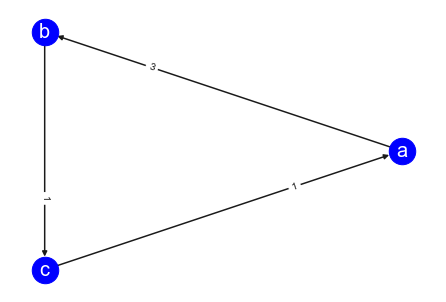

Copeland winners ['a', 'b', 'c']

The profile with a voter with the ranking ['b', 'a', 'c']
+---+---+---+---+
| 2 | 1 | 2 | 1 |
+---+---+---+---+
| a | b | c | b |
| b | c | a | a |
| c | a | b | c |
+---+---+---+---+


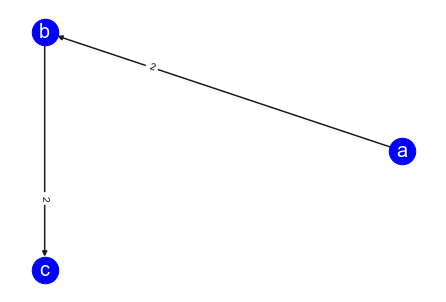

Copeland winners ['a']


In [9]:
vm = copeland

num_cands = 3

rankings = [
    (a, b, c),
    (b, c, a),
    (c, a, b)
]

new_ranking = (b, a, c)

rcounts = [2, 1, 2]

prof = Profile(rankings, num_cands, rcounts, cmap = cmap)

prof.display()
prof.display_margin_graph()

print(f"{vm.name} winners {[cmap[c] for c in vm(prof)]}")
print("")

print(f"The profile with a voter with the ranking {[cmap[c] for c in new_ranking]}")

prof_new = Profile(rankings + [new_ranking], num_cands, rcounts + [1], cmap = cmap)
prof_new.display()
prof_new.display_margin_graph()

print(f"{vm.name} winners {[cmap[c] for c in vm(prof_new)]}")


+---+---+---+
| 2 | 1 | 2 |
+---+---+---+
| a | b | c |
| b | c | a |
| c | a | b |
+---+---+---+


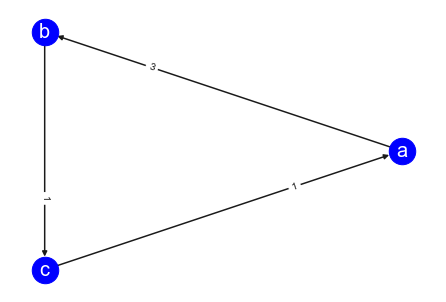

Uncovered Set winners ['a', 'b', 'c']
UC Fishburn winners ['a', 'b', 'c']

The profile with a voter with the ranking ['b', 'a', 'c']
+---+---+---+---+
| 2 | 1 | 2 | 1 |
+---+---+---+---+
| a | b | c | b |
| b | c | a | a |
| c | a | b | c |
+---+---+---+---+


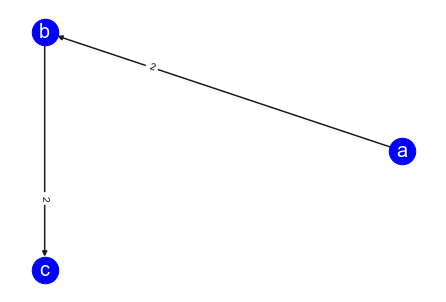

Uncovered Set winners ['a', 'c']
UC Fishburn winners ['a']


In [10]:
vm = uc_gill

num_cands = 3

rankings = [
    (a, b, c),
    (b, c, a),
    (c, a, b)
]

new_ranking = (b, a, c)

rcounts = [2, 1, 2]

prof = Profile(rankings, num_cands, rcounts, cmap = cmap)

prof.display()
prof.display_margin_graph()

print(f"{vm.name} winners {[cmap[c] for c in vm(prof)]}")
print(f"{uc_fish.name} winners {[cmap[c] for c in uc_fish(prof)]}")
print("")

print(f"The profile with a voter with the ranking {[cmap[c] for c in new_ranking]}")

prof_new = Profile(rankings + [new_ranking], num_cands, rcounts + [1], cmap = cmap)
prof_new.display()
prof_new.display_margin_graph()

print(f"{vm.name} winners {[cmap[c] for c in vm(prof_new)]}")
print(f"{uc_fish.name} winners {[cmap[c] for c in uc_fish(prof_new)]}")


In [11]:
vm = strict_nanson

num_cands = 4

rankings = [
    (a, c, d, b),
    (d, b, c, a),
    (c, b, a, d),
    (a, d, c, b),
    (d, c, a, b),
    (d, c, b, a)
]

new_ranking = (c, d, b, a)

rcounts = [1, 1, 3, 3, 1, 1]

prof = Profile(rankings, num_cands, rcounts, cmap = cmap)

prof.display()

print(f"{vm.name} winners {[cmap[c] for c in vm(prof)]}")

print("")

print(f"The profile with a voter with the ranking {[cmap[c] for c in new_ranking]}")

prof_new = Profile(rankings + [new_ranking], num_cands, rcounts + [1], cmap = cmap)
prof_new.display()

print(f"{vm.name} winners {[cmap[c] for c in vm(prof_new)]}")


+---+---+---+---+---+---+
| 1 | 1 | 3 | 3 | 1 | 1 |
+---+---+---+---+---+---+
| a | d | c | a | d | d |
| c | b | b | d | c | c |
| d | c | a | c | a | b |
| b | a | d | b | b | a |
+---+---+---+---+---+---+
Strict Nanson winners ['c']

The profile with a voter with the ranking ['c', 'd', 'b', 'a']
+---+---+---+---+---+---+---+
| 1 | 1 | 3 | 3 | 1 | 1 | 1 |
+---+---+---+---+---+---+---+
| a | d | c | a | d | d | c |
| c | b | b | d | c | c | d |
| d | c | a | c | a | b | b |
| b | a | d | b | b | a | a |
+---+---+---+---+---+---+---+
Strict Nanson winners ['d']


+---+---+---+---+---+---+---+---+---+---+---+---+---+
| 1 | 3 | 1 | 2 | 1 | 1 | 2 | 2 | 1 | 1 | 2 | 2 | 1 |
+---+---+---+---+---+---+---+---+---+---+---+---+---+
| a | a | a | b | d | b | d | a | b | c | b | d | c |
| d | d | c | a | c | d | c | c | a | a | d | b | d |
| b | c | d | c | a | c | b | b | d | d | a | a | b |
| c | b | b | d | b | a | a | d | c | b | c | c | a |
+---+---+---+---+---+---+---+---+---+---+---+---+---+


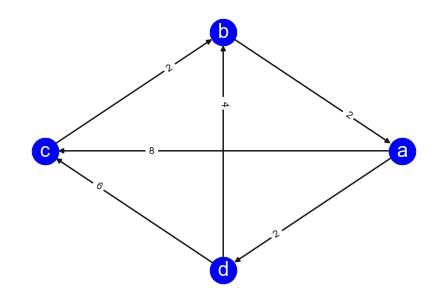

Ranked Pairs winners ['a', 'd']

The profile with a voter with the ranking ['d', 'a', 'c', 'b']
+---+---+---+---+---+---+---+---+---+---+---+---+---+---+
| 1 | 3 | 1 | 2 | 1 | 1 | 2 | 2 | 1 | 1 | 2 | 2 | 1 | 1 |
+---+---+---+---+---+---+---+---+---+---+---+---+---+---+
| a | a | a | b | d | b | d | a | b | c | b | d | c | d |
| d | d | c | a | c | d | c | c | a | a | d | b | d | a |
| b | c | d | c | a | c | b | b | d | d | a | a | b | c |
| c | b | b | d | b | a | a | d | c | b | c | c | a | b |
+---+---+---+---+---+---+---+---+---+---+---+---+---+---+


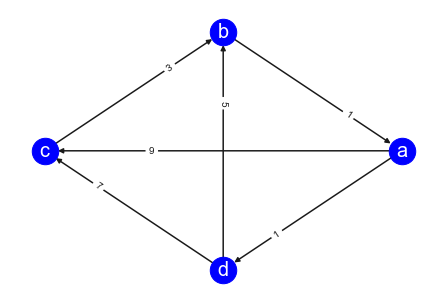

Ranked Pairs winners ['a']


In [12]:
vm = ranked_pairs

num_cands = 4

rankings = [
    (a, d, b, c),
    (a, d, c, b),
    (a, c, d, b),
    (b, a, c, d),
    (d, c, a, b),
    (b, d, c, a),
    (d, c, b, a),
    (a, c, b, d),
    (b, a, d, c),
    (c, a, d, b),
    (b, d, a, c), 
    (d, b, a, c), 
    (c, d, b, a)
]

new_ranking = (d, a, c, b)

rcounts = [1, 3, 1, 2, 1, 1, 2, 2, 1, 1, 2, 2, 1]

prof = Profile(rankings, num_cands, rcounts, cmap = cmap)

prof.display()
prof.display_margin_graph()

print(f"{vm.name} winners {[cmap[c] for c in vm(prof)]}")

print("")

print(f"The profile with a voter with the ranking {[cmap[c] for c in new_ranking]}")

prof_new = Profile(rankings + [new_ranking], num_cands, rcounts + [1], cmap = cmap)
prof_new.display()
prof_new.display_margin_graph()

print(f"{vm.name} winners {[cmap[c] for c in vm(prof_new)]}")


+---+---+---+
| 1 | 2 | 2 |
+---+---+---+
| c | a | b |
| a | b | d |
| d | d | c |
| b | c | a |
+---+---+---+


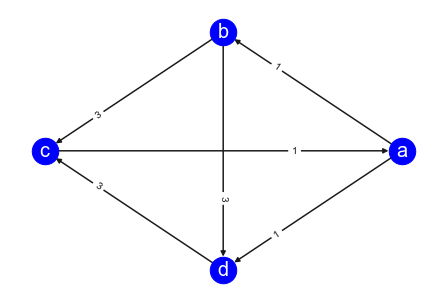

Ranked Pairs ZT winners ['b']

The profile with a voter with the ranking ['b', 'a', 'c', 'd']
+---+---+---+---+
| 1 | 2 | 2 | 1 |
+---+---+---+---+
| c | a | b | b |
| a | b | d | a |
| d | d | c | c |
| b | c | a | d |
+---+---+---+---+


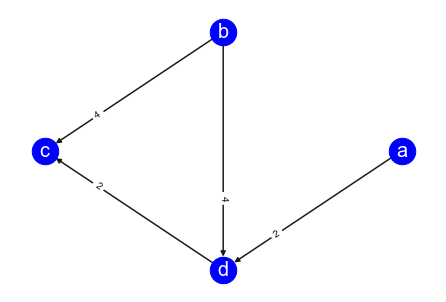

Ranked Pairs ZT winners ['a']


In [13]:
vm = ranked_pairs_zt

num_cands = 4

rankings = [
    (c, a, d, b),
    (a, b, d, c),
    (b, d, c, a)
]

new_ranking = (b, a, c, d)

rcounts = [1, 2, 2]

prof = Profile(rankings, num_cands, rcounts, cmap = cmap)

prof.display()
prof.display_margin_graph()

print(f"{vm.name} winners {[cmap[c] for c in vm(prof)]}")

print("")

print(f"The profile with a voter with the ranking {[cmap[c] for c in new_ranking]}")

prof_new = Profile(rankings + [new_ranking], num_cands, rcounts + [1], cmap = cmap)
prof_new.display()
prof_new.display_margin_graph()

print(f"{vm.name} winners {[cmap[c] for c in vm(prof_new)]}")

+---+---+
| 1 | 1 |
+---+---+
| a | c |
| b | a |
| c | b |
+---+---+


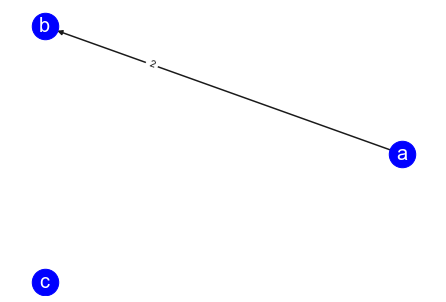

Top Cycle winners ['a', 'b', 'c']
GOCHA winners ['a', 'c']

The profile with a voter with the ranking ['b', 'a', 'c']
+---+---+---+
| 1 | 1 | 1 |
+---+---+---+
| a | c | b |
| b | a | a |
| c | b | c |
+---+---+---+


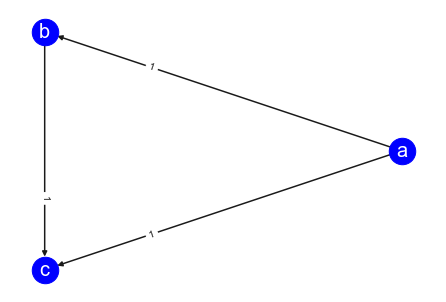

Top Cycle winners ['a']
GOCHA winners ['a']


In [16]:
vm = getcha

num_cands = 3

rankings = [
    (a, b, c),
    (c, a, b)
]

new_ranking = (b, a, c)

rcounts = [1, 1]

prof = Profile(rankings, num_cands, rcounts, cmap = cmap)

prof.display()
prof.display_margin_graph()

print(f"{vm.name} winners {[cmap[c] for c in vm(prof)]}")
print(f"{gocha.name} winners {[cmap[c] for c in gocha(prof)]}")

print("")

print(f"The profile with a voter with the ranking {[cmap[c] for c in new_ranking]}")

prof_new = Profile(rankings + [new_ranking], num_cands, rcounts + [1], cmap = cmap)
prof_new.display()
prof_new.display_margin_graph()

print(f"{vm.name} winners {[cmap[c] for c in vm(prof_new)]}")
print(f"{gocha.name} winners {[cmap[c] for c in gocha(prof_new)]}")